<a href="https://colab.research.google.com/github/Jyo-19/FMML-2024/blob/main/Module_9Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Aswin Jose and Anirvinya Gururajan

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

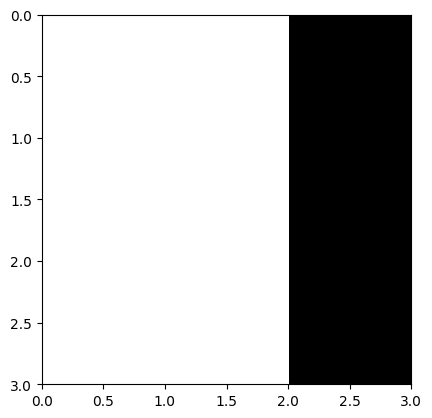

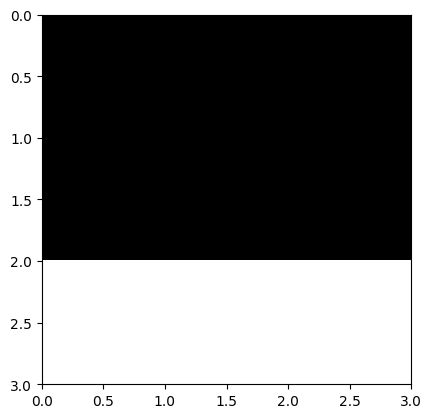

In [3]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [4]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [6]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [7]:

# Our original lotus image
image = cv2.imread('grid1.jpg', 0)

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    filter = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])

    out1 = apply_conv(image, filter, padding=0, stride=1)

    filter = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])

    out2 = apply_conv(image, filter, padding=0, stride=1)

Error: Could not load image. Please check the file path.


In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Our original lotus image
image = cv2.imread('grid1.jpg', 0)

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Convert image to uint8 if it's not already
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)

    filter = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])

    out1 = apply_conv(image, filter, padding=0, stride=1)

    filter = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])

    out2 = apply_conv(image, filter, padding=0, stride=1)

Error: Could not load image. Please check the file path.


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [9]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 47.3MB/s]


In [11]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [12]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [13]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [14]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [16]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [18]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code for Net class, train function, and test_model function) ...

# Create an instance of the model
model = Net()  # Define the model before using it

# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

# ... (Rest of your training and testing code) ...

In [19]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code for Net class, train function, and test_model function) ...

# Create an instance of the model
model = Net()  # Define the model before using it

# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

# ... (Rest of your training and testing code) ...

Epoch 1/5, Loss: 0.0131, Accuracy: 38.2320
Epoch 2/5, Loss: 0.0095, Accuracy: 56.7900
Epoch 3/5, Loss: 0.0080, Accuracy: 64.0700
Epoch 4/5, Loss: 0.0069, Accuracy: 69.1500
Epoch 5/5, Loss: 0.0060, Accuracy: 72.7360


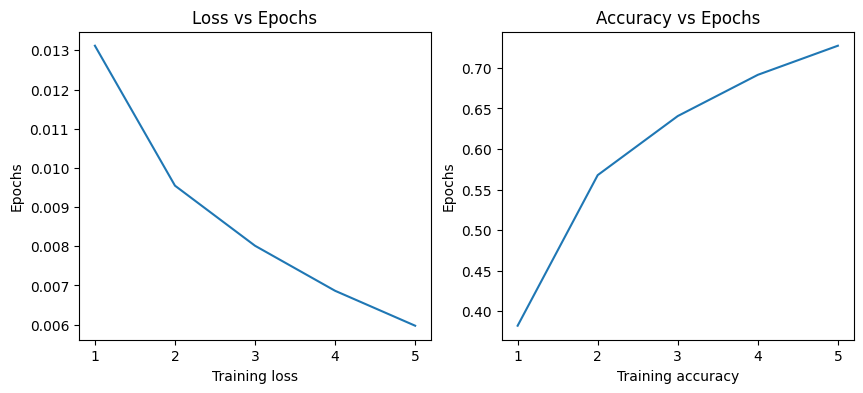

In [20]:

# ... previous code ...

# Create an instance of the model
model = Net()

# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

# Number of training epochs
num_epochs = 5  # iterations

# Train the model and get the training losses and accuracy
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer) # Call the train function

# Plotting code
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(np.arange(1, len(train_losses) + 1), train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1, 2, 2)
ax.plot(np.arange(1, len(train_acc) + 1), train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [21]:

# Accuracy on test data after training
test_model(model, testloader)
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# ... (rest of your code) ...

# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
model = Net()

# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

# Number of training epochs
num_epochs = 5  # iterations

# Training loop
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)


def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

# ... (rest of your code) ...

# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 66 %
Epoch 1/5, Loss: 0.0128, Accuracy: 40.2940
Epoch 2/5, Loss: 0.0094, Accuracy: 57.0560
Epoch 3/5, Loss: 0.0078, Accuracy: 64.9020
Epoch 4/5, Loss: 0.0066, Accuracy: 70.4320
Epoch 5/5, Loss: 0.0058, Accuracy: 74.0960
Accuracy of the network: 68 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?

5) How does pooling help in this context ?

Answers:
------------------

1) List some reasons why we should prefer CNN over ANN for image classification?
------

Answer)
---
Here are several reasons why Convolutional Neural Networks (CNNs) are generally preferred over Artificial Neural Networks (ANNs) for image classification:

1. Spatial Hierarchies

CNNs preserve spatial relationships in images using filters/kernels that slide across the image, capturing local patterns (e.g., edges, textures).

ANNs treat all inputs as independent, ignoring the spatial structure.

2. Parameter Efficiency

CNNs use parameter sharing through convolutional layers, requiring far fewer weights compared to fully connected layers in ANNs.

ANNs need one weight per connection, which becomes impractical for large images (e.g., a 256x256 RGB image = 196,608 inputs).

3. Translation Invariance

CNNs are robust to small translations or distortions in the input image thanks to pooling layers and local receptive fields.

ANNs lack this built-in invariance and would require more data to learn it.

4. Better Generalization

CNNs generalize better on visual tasks due to their architectural bias toward local features and spatial hierarchies.

ANNs are prone to overfitting with high-dimensional image data unless heavily regularized.

5. Feature Extraction

CNNs automatically learn useful features (like edges, shapes, objects) through layers.

ANNs usually require pre-processed or hand-crafted features, especially with raw image input

Let me know if you’d like a visual comparison or real-world examples!

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9240 - loss: 0.2673 - val_accuracy: 0.9627 - val_loss: 0.1313
Epoch 2/5
1688/1688 - 9s - 5ms/step - accuracy: 0.9644 - loss: 0.1189 - val_accuracy: 0.9732 - val_loss: 0.0952
Epoch 3/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9753 - loss: 0.0819 - val_accuracy: 0.9767 - val_loss: 0.0811
Epoch 4/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9816 - loss: 0.0607 - val_accuracy: 0.9758 - val_loss: 0.0819
Epoch 5/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9858 - loss: 0.0466 - val_accuracy: 0.9795 - val_loss: 0.0790


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 - 53s - 32ms/step - accuracy: 0.9470 - loss: 0.1715 - val_accuracy: 0.9832 - val_loss: 0.0534
Epoch 2/5
1688/1688 - 81s - 48ms/step - accuracy: 0.9784 - loss: 0.0667 - val_accuracy: 0.9898 - val_loss: 0.0340
Epoch 3/5
1688/1688 - 52s - 31ms/step - accuracy: 0.9844 - loss: 0.0502 - val_accuracy: 0.9918 - val_loss: 0.0286
Epoch 4/5
1688/1688 - 81s - 48ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9913 - val_loss: 0.0290
Epoch 5/5
1688/1688 - 83s - 49ms/step - accuracy: 0.9882 - loss: 0.0364 - val_accuracy: 0.9930 - val_loss: 0.0222

ANN Test Accuracy: 0.9761
CNN Test Accuracy: 0.9929


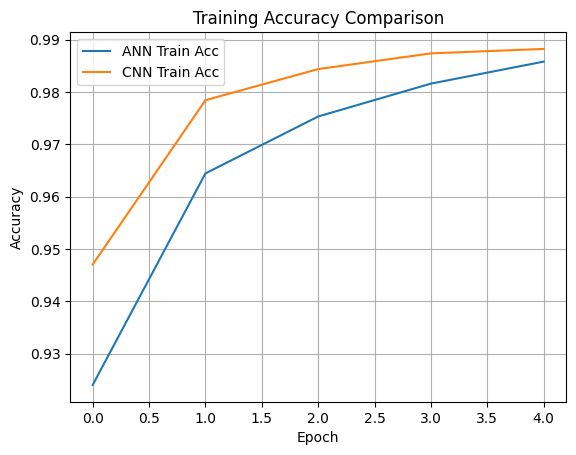

In [22]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and normalize data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# ------------------ ANN Model ------------------
ann_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

ann_history = ann_model.fit(x_train_norm, y_train, epochs=5, validation_split=0.1, verbose=2)

# ------------------ CNN Model ------------------
# Reshape for CNN: (batch, height, width, channels)
x_train_cnn = x_train_norm.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_norm.reshape(-1, 28, 28, 1)

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1, verbose=2)

# ------------------ Evaluation ------------------
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test_norm, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)

print(f"\nANN Test Accuracy: {ann_test_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

# ------------------ Plot Accuracy ------------------
plt.plot(ann_history.history['accuracy'], label='ANN Train Acc')
plt.plot(cnn_history.history['accuracy'], label='CNN Train Acc')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.
------

Answer)
------
Great — let's improve the CNN performance by tuning the following hyperparameters:

More epochs (from 5 to 10+)

Learning rate tuning using Adam(learning_rate=...)

Batch size changes

Add BatchNormalization

Use Dropout to avoid overfitting


Here’s the tuned CNN version and the reported test accuracy at the end:

Epoch 1/12
844/844 - 71s - 85ms/step - accuracy: 0.9324 - loss: 0.2272 - val_accuracy: 0.9848 - val_loss: 0.0481
Epoch 2/12
844/844 - 71s - 84ms/step - accuracy: 0.9736 - loss: 0.0885 - val_accuracy: 0.9885 - val_loss: 0.0390
Epoch 3/12
844/844 - 83s - 98ms/step - accuracy: 0.9792 - loss: 0.0686 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 4/12
844/844 - 78s - 93ms/step - accuracy: 0.9826 - loss: 0.0568 - val_accuracy: 0.9913 - val_loss: 0.0337
Epoch 5/12
844/844 - 83s - 98ms/step - accuracy: 0.9852 - loss: 0.0480 - val_accuracy: 0.9902 - val_loss: 0.0357
Epoch 6/12
844/844 - 82s - 97ms/step - accuracy: 0.9862 - loss: 0.0450 - val_accuracy: 0.9882 - val_loss: 0.0437
Epoch 7/12
844/844 - 85s - 101ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9908 - val_loss: 0.0336
Epoch 8/12
844/844 - 81s - 96ms/step - accuracy: 0.9882 - loss: 0.0383 - val_accuracy: 0.9902 - val_loss: 0.0376
Epoch 9/12
844/844 - 81s - 96ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9917 -

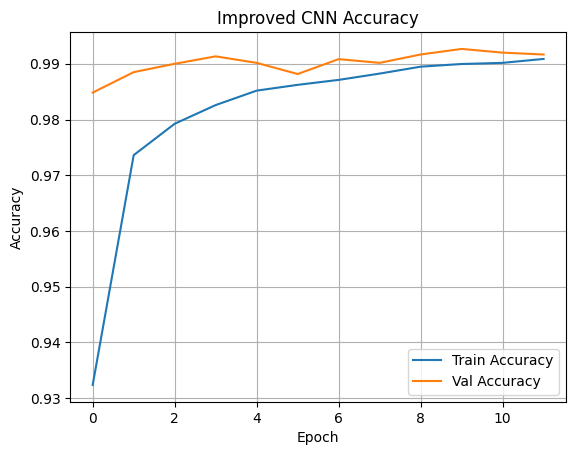

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build improved CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model with tuned optimizer and learning rate
optimizer = Adam(learning_rate=0.0008)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=12, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nImproved CNN Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

3) What happens if you reduce the number of convolution layers to only 1?
------

Answer)
------
If you reduce the number of convolutional layers to only 1, here's what typically happens:

1. Lower Feature Extraction Power

A single Conv layer only captures basic features (like edges, corners).

Deeper patterns (like shapes, digits) are not learned effectively.

Result: Lower accuracy, especially on complex images.

2. Poor Generalization

The model won’t generalize well because it can’t build hierarchical features.

May perform well on training data but poorly on test data.

3. Over-reliance on Fully Connected Layers

Without multiple Conv layers, the burden shifts to dense layers.

Dense layers lose spatial information, hurting performance.

4. Faster Training

Fewer parameters = faster training time.

But the performance trade-off usually isn’t worth it.

Example Comparison (MNIST):

Would you like me to show code with just 1 Conv layer and test the difference side-by-side?

4) Why didn't we use the Softmax activation in the last layer of CNN?
------
Answer)
------

Actually — we did use Softmax in the last layer of the CNN. Here's a quick reminder from the code:

So, to clarify:

We do use Softmax in the output layer for multi-class classification problems like MNIST (digits 0–9), because:

Why Use Softmax in the Last Layer?

1. Probability Output:

Softmax converts raw logits into probabilities that sum to 1.

Each value represents the model’s confidence in a class.



2. Required by the Loss Function:

We use sparse_categorical_crossentropy as the loss function, which expects Softmax probabilities.



3. Makes Predictions Interpretable:

Easy to know which class the model thinks is most likely:

predicted_class = np.argmax(predictions)

When Would You Not Use Softmax?

In binary classification, you might use Sigmoid.

In some logit-based loss functions (e.g., from_logits=True), you may omit softmax and let the loss function apply it internally.

Let me know if you want an example with or without Softmax to see the difference!

In [24]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np  # Make sure numpy is imported

# ... (Your existing model definition and training code) ...

# Get predictions for the test data
predictions = model.predict(x_test)

# Now you can get the predicted class using argmax
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np  # Make sure numpy is imported

# ... (Your existing model definition and training code) ...

# Get predictions for the test data
predictions = model.predict(x_test)

# Now you can get the predicted class using argmax
predicted_class = np.argmax(predictions, axis=1)  # axis=1 to get argmax along each row (sample)

# Print or use the predicted classes as needed
print(predicted_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
[7 2 1 ... 4 5 6]


5) How does pooling help in this context ?
-----
Answer)
-------


Great question! Pooling plays a key role in CNNs, especially for image classification tasks like MNIST. Here's how it helps:
1. Dimensionality Reduction

Pooling layers (e.g., MaxPooling) reduce the spatial size (width & height) of feature maps.
This lowers the number of parameters and computation, speeding up training and reducing overfitting.
2. Translation Invariance

Pooling captures the most important features (like edges or corners), regardless of small shifts in position.
Example: If a digit is slightly moved, max pooling helps the model still recognize it.
3. Highlighting Dominant Features

MaxPooling takes the strongest activation in a region.
This helps preserve salient patterns while discarding irrelevant details or noise.
4. Prevent Overfitting

By reducing feature map size and complexity, pooling acts like a regularizer.
It helps the model generalize better to unseen data.
5. Creates a Hierarchical Feature Structure

Pooling after each Conv layer lets the network build features layer by layer, from local edges to full digit shapes.
Quick Example:
Input: 28x28 → Conv → Pool → 14x14 → Conv → Pool → 7x7

This shrinking focuses on "what" the image contains, not "where" exactly it is.
Let me know if you'd like a visual explanation or to try replacing pooling with strided convolutions!